# AB Testing

1. Permutation Tests
2. Binary Processes
    * AB Tests
    * Binomial Distribution

**Importing Our Functions**

In [12]:
import numpy as np
import matplotlib as matplt
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import norm
from scipy import stats

from numpy import random

# Permutation tests

def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

ModuleNotFoundError: No module named 'scipy'

In [11]:
# %load ../ourFunctions.py
import numpy as np
import matplotlib as matplt
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import norm
from scipy import stats

from numpy import random
#random.seed(42)

def toss_biased_coin(pHead, n, seed=None):
  """
    Simulates n tosses of a biased coin and returns the proportion of heads,
    using rng.choice() for better conceptual clarity.

    Parameters
    ----------
    p : float
        Probability of heads (between 0 and 1).
    n : int
        Number of tosses.
    seed : int, optional
        Random seed for reproducibility.

    Returns
    -------
    float
        Proportion of heads observed.
    """
  rng = np.random.default_rng(seed)

  tosses = rng.choice([0,1], size=n, p=[1-pHead,pHead])
  cts = np.sum(tosses == 1)
  cts = np.sum(tosses)
  prop_heads = cts/n

  prop_heads = np.mean(tosses)

  return prop_heads

ModuleNotFoundError: No module named 'scipy'

One research question could be of course to get a confidence interval on the number 0.05 ?

But closely related is hypothesis testing, where we ask:

**Could the difference of -0.05 be due to chance ??**

The answer that you give will best be a **p value** !!



## Permutation 2-sample test

We have used the bootstrap to compare two sets of data, both of which are samples. In particular, we can test two-sample hypotheses such as  

$H_0: \mu_m = \mu_f, H_A: \mu_m \neq \mu_f$

or the one-sided versions:

$H_0: \mu_m = \mu_f, H_A: \mu_m > \mu_f$

$H_0: \mu_m = \mu_f, H_A: \mu_m < \mu_f$


Another way to compare 2 distributions (in some ways much more straightforward than the bootstrap) is **permutation sampling**. It directly simulates the hypothesis that two variables have identical probability distributions.

A permutation sample of two arrays having respectively $n_1$ and $n_2$ entries is constructed by concatenating the arrays together, scrambling the contents of the concatenated array, and then taking the first $n_1$ entries as the permutation sample of the first array and the last $n_2$ entries as the permutation sample of the second array.

At DataCamp the first example offers a nice visualization of this process:

<div>
<img src="./figures/PennsylvaniaOhioDataCamp.png" width="400"/>
</div>

Take a look at the code in *ourFunctions.py* to run a permutation test

------

**Let us apply our first permutation sampling on the Titanic data. (First, we explore the data a bit)**

In [14]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [15]:
PclassSurv = titanic.groupby(['pclass', 'survived'])
PclassSurv.size()

pclass  survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64

In [16]:
pd.crosstab(titanic.pclass, titanic.survived,margins=True)

survived,0,1,All
pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [17]:
WomenOnly = titanic[titanic["sex"]=="female"]
pd.crosstab(WomenOnly.pclass, WomenOnly.survived,margins=True)

survived,0,1,All
pclass,,,
1,3,91,94
2,6,70,76
3,72,72,144
All,81,233,314


------

**Test the claim that the survival chances of women in 1st and 2nd class were pretty much the same.**

1. Write down the Null hypothesis and test statistic
2. Write code that generates permutation samples from two data sets
3. Generate many **permutation replicates** for the relevant Titanic subset
4. Compute a p-value

In [20]:
#WomenOnly_1class = titanic[(titanic["sex"]=="female")& (titanic["pclass"]==1)]
#WomenOnly_2class = titanic[(titanic["sex"]=="female")& (titanic["pclass"]==2)]

titanic_women_p1= WomenOnly[WomenOnly['pclass'] == 1]["survived"]
titanic_women_p2= WomenOnly[WomenOnly['pclass'] == 2]["survived"]
diff_reps = draw_perm_reps(titanic_women_p1, titanic_women_p2, size = 500)
obsmean_p1 = np.mean(titanic_women_p1)
obsmean_p2 =np.mean(titanic_women_p2)
obsDiff =obsmean_p1-obsmean_p2
p_val= np.mean(diff_reps >= obsDiff)
p_val

TypeError: draw_perm_reps() missing 1 required positional argument: 'func'

We could choose alpha = 0.05, but keep in mind the following
- would you step into a plane that has a 5% crash probability ?
- Would you buy a drug that has a 5% chance of severe side effects ?


**What is the difference between these two methods (bootstrap, permutation) ?**

Testing the hypothesis that two samples have the same distribution may be done with a bootstrap test, but a permutation test is preferred because it is more accurate (exact, in fact). But a permutation test is not as versatile as the bootstrap.

We often want to test the hypothesis that population A and population B have the same mean, but not necessarily the same distribution. This is difficult with a permutation test as it assumes **exchangeability**.

We will get back to this topic!

[More info..](https://ntrs.nasa.gov/archive/nasa/casi.ntrs.nasa.gov/20150001882.pdf)

------

## 2-sample t test

Of course there is an equivalent fully parametric 2-sample test, the t-test.

We first read in the [The National Survey of Family Growth](https://greenteapress.com/thinkstats2/html/thinkstats2002.html#sec7) data from the [think stats book](https://greenteapress.com/wp/think-stats-2e/).

Look at section 1.7 for a description of the variables.

In [5]:
#preg = pd.read_hdf('data/pregNSFG.h5', 'df')
#preg = pd.read_csv('data/pregNSFG.csv.gz', compression='gzip')
url = "https://raw.githubusercontent.com/markusloecher/DataScience-HWR/refs/heads/main/data/pregNSFG.csv.gz"
preg = pd.read_csv(url, compression='gzip')
#only look at live births
live = preg[preg.outcome == 1]

#define first babies
firsts = live[live.birthord == 1]

#and all others
others = live[live.birthord != 1]
preg

,Unnamed: 0,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13588,13588,12571,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,...,0,0,0,4670.540953,5795.692880,6269.200989,1,78,NaN,6.1875
13589,13589,12571,2,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,0,0,0,4670.540953,5795.692880,6269.200989,1,78,NaN,NaN
13590,13590,12571,3,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,0,0,0,4670.540953,5795.692880,6269.200989,1,78,NaN,NaN
13591,13591,12571,4,NaN,NaN,NaN,NaN,6.0,NaN,1.0,...,0,0,0,4670.540953,5795.692880,6269.200989,1,78,NaN,7.5000


In [ ]:
tRes = stats.ttest_ind(firsts.prglngth.values, others.prglngth.values)
p = pd.Series([tRes.pvalue,tRes.statistic], index = ['p-value:', 'test statistic:'])
p

p-value:           0.167554
test statistic:    1.380215
dtype: float64

In [ ]:
#ttest_ind often underestimates p for unequal variances:
tRes = stats.ttest_ind(firsts.prglngth.values, others.prglngth.values, equal_var = False)
p = pd.Series([tRes.pvalue,tRes.statistic], index = ['p-value:', 'test statistic:'])
p

p-value:           0.168528
test statistic:    1.377059
dtype: float64

1. Can you reproduce the first p-value from the [test statistic](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html) ?
2. Run a permutation test instead

In [ ]:
from scipy.stats import binom

--------

### A/B Testing

1. Perform a permutation test on the DataCamp example:

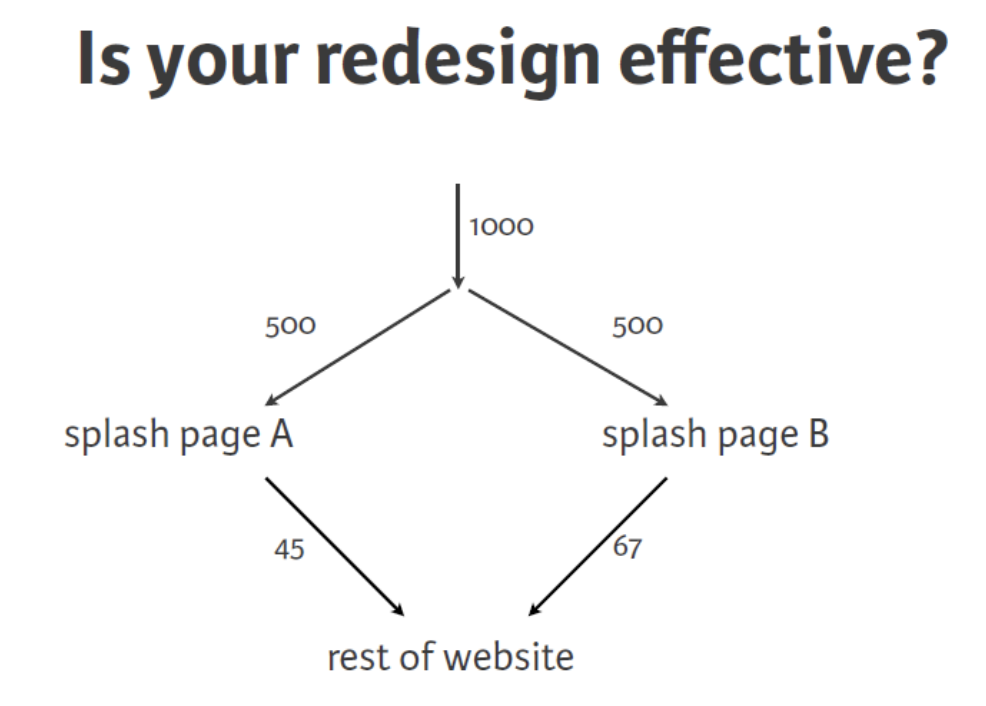

In [ ]:
#generate data from 500->45 and 500->67

In [ ]:
clickthroughA = [True]*45 + [False]*455
clickthroughB = [True]*67 + [False]*433

# next permutation tests 